<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Linear Regression Project: Medical Insurance Cost</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>
<p style="color: pink">The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors and based on data from other companies and a particular study have managed to gather a set of data to train a predictive model.
</p>

In [1]:
import pandas as pd

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Exploration and data cleaning</h3>
<p style="color: pink">We will conduct a concise Exploratory Data Analysis (EDA), focusing on essential aspects without delving into intricate details.</p>

In [2]:
total_data.shape

(1338, 7)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<ul style="color: pink">
    <li>We have 4 numeric characteristics among which we find the target to predict: <em>age, bmi, children and charges.</em></li>
    <li>The 3 categorical characteristics are: sex, smoker and region.</li>
</ul>

In [4]:
total_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
total_data = total_data.drop_duplicates().reset_index(drop=True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3 id="step3" style="font-family: Comic Sans MS; color: #68FF33">3. Analysis of univariate variables</h3>
<strong><span style="color: red">Analysis of categorical variables</span></strong>

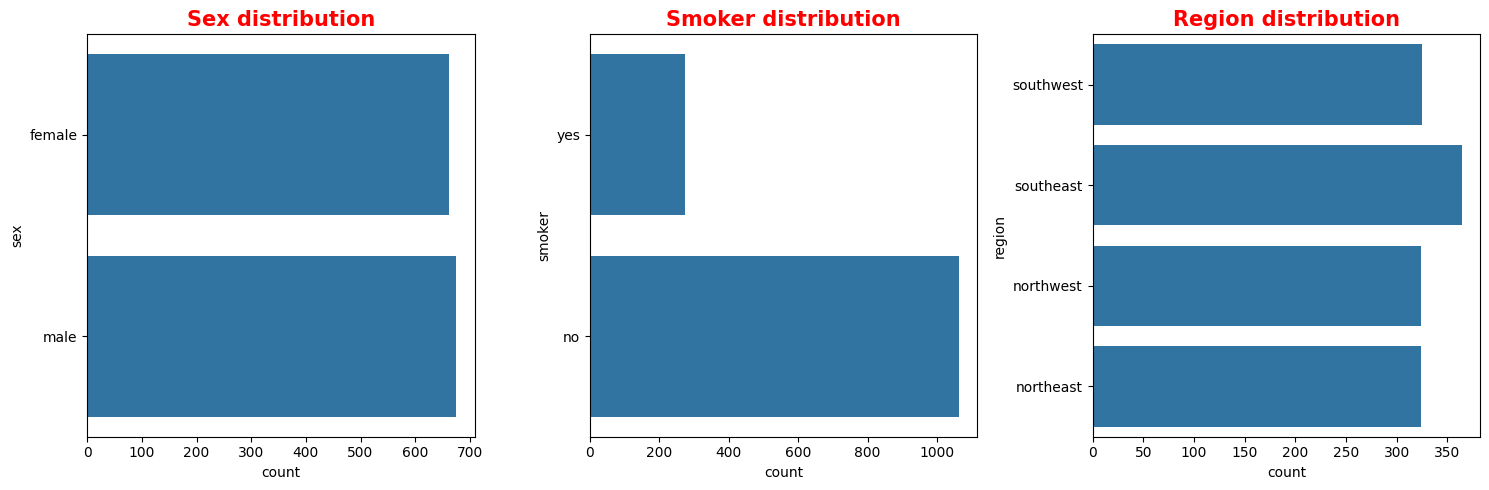

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Display subplots for sex, smoker and region
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(total_data['sex'], ax=axes[0])
axes[0].set_title('Sex distribution', color='red', fontsize=15, fontweight='bold')
sns.countplot(total_data['smoker'], ax=axes[1])
axes[1].set_title('Smoker distribution', color='red', fontsize=15, fontweight='bold')
sns.countplot(total_data['region'], ax=axes[2])
axes[2].set_title('Region distribution', color='red', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<strong><span style="color: red">Analysis of numerical variables</span></strong>

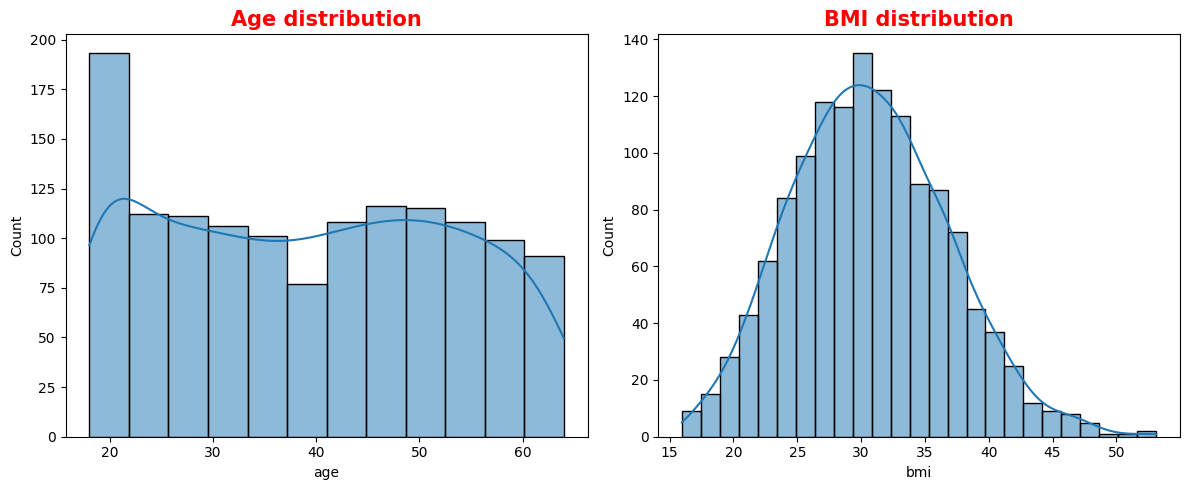

In [7]:
# Display subplots for age, bmi and children
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(total_data['age'], kde=True, ax=axes[0])
axes[0].set_title('Age distribution', color='red', fontsize=15, fontweight='bold')
sns.histplot(total_data['bmi'], kde=True, ax=axes[1])
axes[1].set_title('BMI distribution', color='red', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<strong><span style="color: red">Correlation Analysis</span></strong>

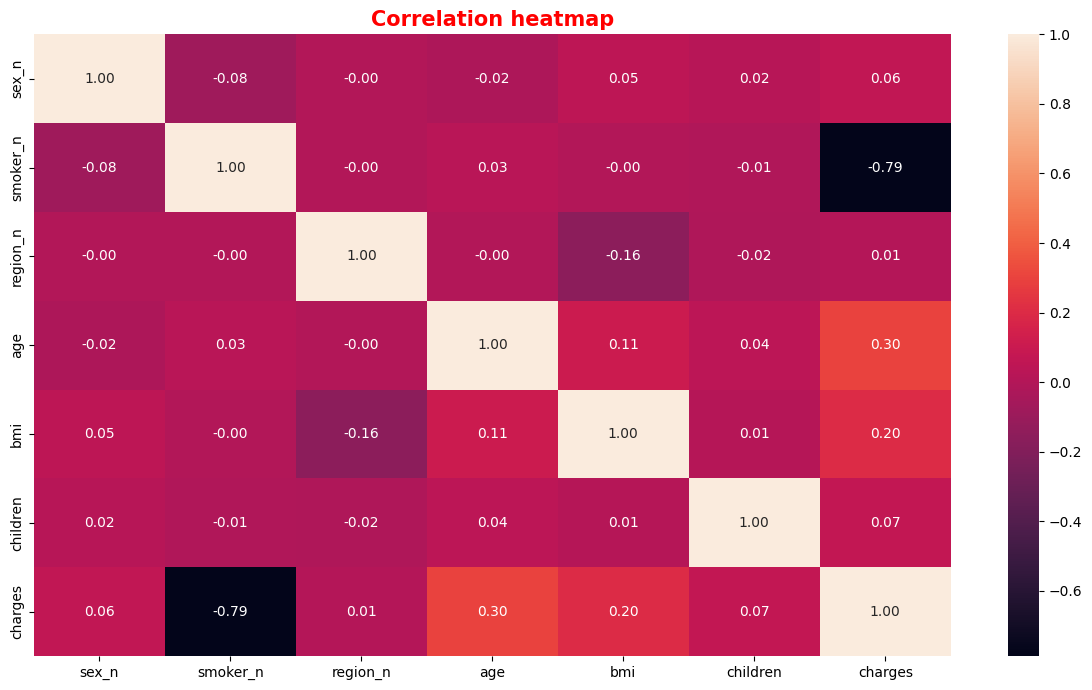

In [8]:
# Factorize the categorical values
total_data['sex_n'] = pd.factorize(total_data['sex'])[0]
total_data['smoker_n'] = pd.factorize(total_data['smoker'])[0]
total_data['region_n'] = pd.factorize(total_data['region'])[0]
num_variables = ['sex_n', 'smoker_n', 'region_n', 'age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(figsize=(12, 7))
sns.heatmap(total_data[num_variables].corr(), annot=True, fmt='.2f')
plt.title('Correlation heatmap', color='red', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">4. Feature engineering</h3>
<strong><span style="color: red">Min-Max scaler</span></strong>

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index=total_data.index, columns=num_variables)
total_data_scal.head()

,sex_n,smoker_n,region_n,age,bmi,children,charges
0,0.0,0.0,0.000000,0.021739,0.321227,0.0,0.251611
1,1.0,1.0,0.333333,0.000000,0.479150,0.2,0.009636
2,1.0,1.0,0.333333,0.217391,0.458434,0.6,0.053115
3,1.0,1.0,0.666667,0.326087,0.181464,0.0,0.333010
4,1.0,1.0,0.666667,0.304348,0.347592,0.0,0.043816


<strong><span style="color: red">Feature selection</span></strong>

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop(['charges'], axis=1)
y = total_data_scal['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(f_regression, k=4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)
X_train_sel.head()

,smoker_n,age,bmi,children
0,1.0,0.108696,0.230024,0.0
1,1.0,0.065217,0.263250,0.4
2,1.0,0.739130,0.580172,0.4
3,1.0,0.978261,0.686306,0.0
4,1.0,0.630435,0.286252,0.4


<ul style="color: pink">
    <li>In this case, the scoring function is f_regression and k is 4, so the 4 features with the highest F-values in a univariate regression analysis will be selected.</li>
    <li>The fit method computes the scores for each feature and stores them in the selection_model object. The get_support method is then used to get a Boolean mask that indicates which features have been selected.</li>
    <li>Last the new DataFrames X_train_sel and X_test_sel contain only the selected features. The transform method applies the feature selection to the data, and the result is converted back into a DataFrame with the selected column names.</li>
</ul>

In [11]:
X_test_sel.head()

,smoker_n,age,bmi,children
0,1.0,0.673913,0.176352,0.0
1,1.0,0.239130,0.259349,0.8
2,1.0,0.717391,0.549502,0.6
3,0.0,0.282609,0.495830,0.6
4,1.0,0.282609,0.603444,0.4


In [12]:
X_train_sel['charges'] = y_train.values # also can be written as X_train_sel['charges'] = list(y_train)
X_test_sel['charges'] = y_test.values
X_train_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/linear-regression-project/data/processed/clean_train.csv', index=False)
X_test_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/linear-regression-project/data/processed/clean_test.csv', index=False)

<h3 id="step5" style="font-family: Comic Sans MS; color: #68FF33">5. Linear Regression: Model training and optimization</h3>
<strong><span style="color: red">Reading the processed dataset and plotting features</span></strong>

In [13]:
train_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/linear-regression-project/data/processed/clean_train.csv')
test_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/linear-regression-project/data/processed/clean_test.csv')
train_data.head()

,smoker_n,age,bmi,children,charges
0,1.0,0.108696,0.230024,0.0,0.020339
1,1.0,0.065217,0.263250,0.4,0.034446
2,1.0,0.739130,0.580172,0.4,0.516374
3,1.0,0.978261,0.686306,0.0,0.196070
4,1.0,0.630435,0.286252,0.4,0.137177


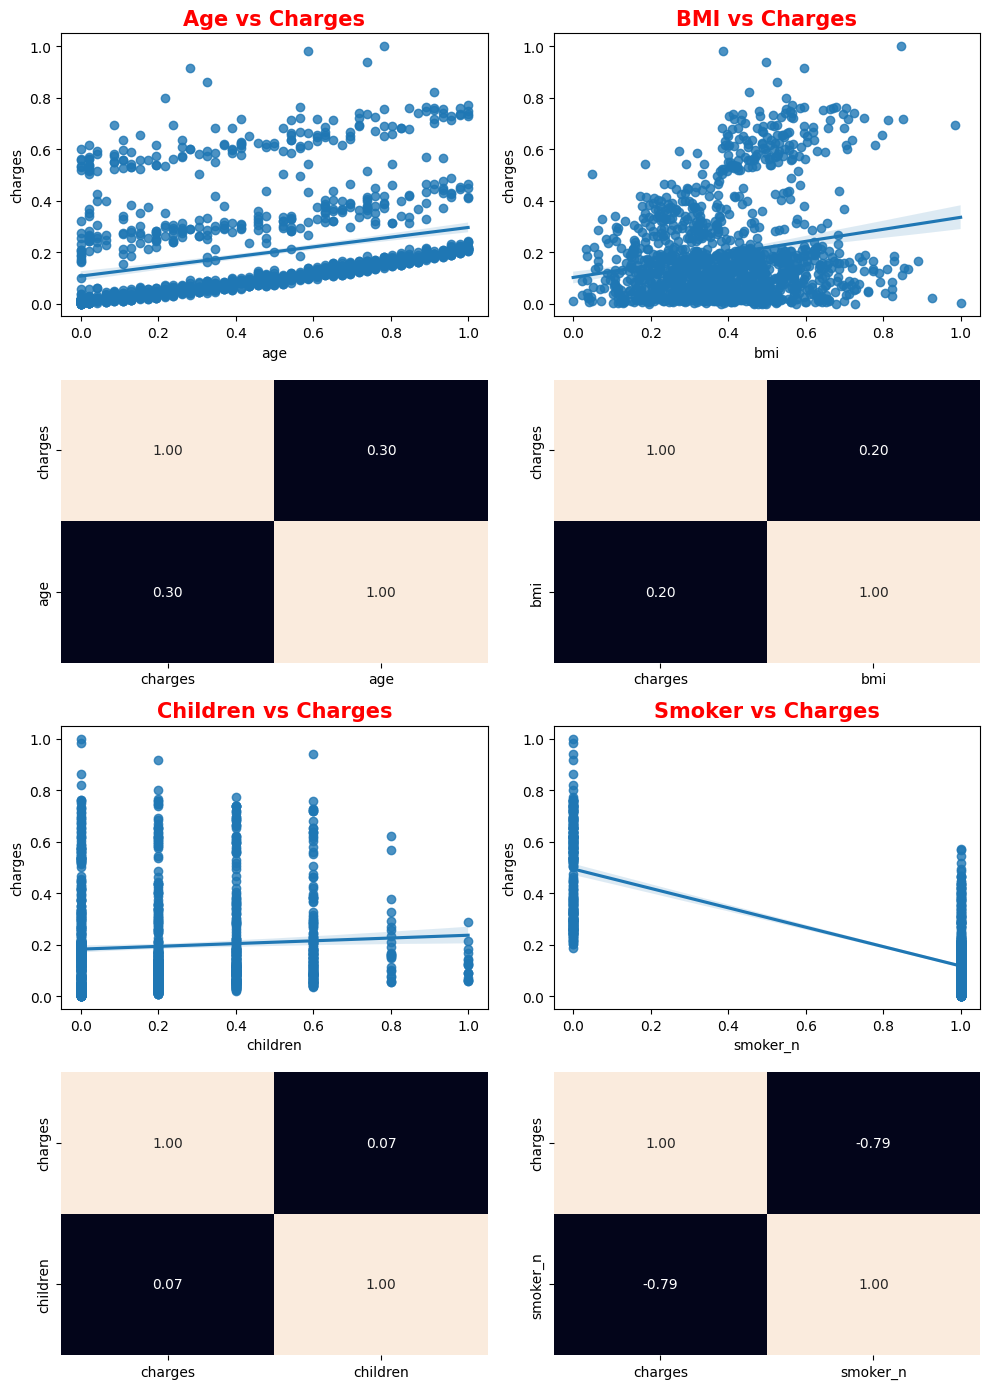

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(x='age', y='charges', data=total_data, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Charges', color='red', fontsize=15, fontweight='bold')
sns.heatmap(total_data[['charges', 'age']].corr(), annot=True, fmt='.2f', ax=axes[1, 0], cbar=False)

sns.regplot(x='bmi', y='charges', data=total_data, ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Charges', color='red', fontsize=15, fontweight='bold')
sns.heatmap(total_data[['charges', 'bmi']].corr(), annot=True, fmt='.2f', ax=axes[1, 1], cbar=False)

sns.regplot(x='children', y='charges', data=total_data, ax=axes[2, 0])
axes[2, 0].set_title('Children vs Charges', color='red', fontsize=15, fontweight='bold')
sns.heatmap(total_data[['charges', 'children']].corr(), annot=True, fmt='.2f', ax=axes[3, 0], cbar=False)

sns.regplot(x='smoker_n', y='charges', data=total_data, ax=axes[2, 1])
axes[2, 1].set_title('Smoker vs Charges', color='red', fontsize=15, fontweight='bold')
sns.heatmap(total_data[['charges', 'smoker_n']].corr(), annot=True, fmt='.2f', ax=axes[3, 1], cbar=False)

plt.tight_layout()
plt.show()

<p style="color: pink">From the above we observe that the most correlated variables with the target are smoker_n and age and the least correlated is children. Next we will use the train set to train the model, while with the test we will evaluate it to measure its degree of effectiveness. We will also split the predictors of the features.</p>

In [15]:
X_train = train_data.drop(['charges'], axis=1)
y_train = train_data['charges']
X_test = test_data.drop(['charges'], axis=1)
y_test = test_data['charges']

<strong><span style="color: red">Initialization and training of the model</span></strong>

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<span style="color: #33FFFC">After the training process we can know the parameters (variables a and b1, b2...bn) that the model has fitted:</span>

In [17]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2...bn): {model.coef_}")

Intercept (a): 0.31958271833089463
Coefficients (b1, b2...bn): [-0.36780589  0.1829699   0.18111814  0.04293572]


In [18]:
y_pred = model.predict(X_test)
#y_pred

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean squared error (MSE): 0.009150574110332002
R-squared: 0.8045531086669286


<p style="color: #33FFFC">Regarding R-squared, the result is a value between 0 and 1 that describes the proportion of variance explained by the model: the closer to 1 this value is, the better the model is fitting the validation data. If we rely on the R-squared value, we observe that it is 80%, not very high value, then 80% of the data are explained by the model, should be improved. This type of model cannot be optimized due to the absence of hyperparameters.</p>